# Binary Ninja Analysis Time vs File Size

This notebook loads the CSV produced by the Binary Ninja script (`size_bytes, elapsed_ms`)
and visualises the relationship between object size and analysis time.  
It also fits and overlays a linear trend‑line so you can see the overall scaling behaviour.

*Change the `CSV_PATH` variable below if your CSV lives somewhere else.*

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ↩️  Edit this path if needed
CSV_PATH = "/home/nicabi/Desktop/EPFL/SemProject/binja-xtensa-epfl-project/evaluation/analysis_times_updated_plugin_latest_3.csv"

# Explicit column order so pandas auto-parses them correctly
cols = ["file", "size_bytes", "elapsed_ms",
        "functions", "instructions", "unimpl_total"]

df = pd.read_csv(CSV_PATH, usecols=cols)

# Ensure numeric fields are proper numbers
for c in cols[1:]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df.sort_values("size_bytes", inplace=True)_latest_3
print(f"{len(df)} rows loaded")
df.head()
plt.figure(figsize=(7, 5))

# Scatter plot
plt.scatter(df["size_bytes"], df["elapsed_ms"], alpha=0.6, label="samples")

plt.xlabel("File size (bytes)")
plt.ylabel("Analysis time (ms)")
plt.title("Binary Ninja analysis time vs file size")
plt.legend()
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2694775275.py, line 18)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ↩️  Edit this path if needed
CSV_PATH = "/home/nicabi/Desktop/EPFL/SemProject/binja-xtensa-epfl-project/evaluation/analysis_times_initial_plugin_latest_3.csv"

# Explicit column order so pandas auto-parses them correctly
cols = ["file", "size_bytes", "elapsed_ms",
        "functions", "instructions", "unimpl_total"]

df = pd.read_csv(CSV_PATH, usecols=cols)

# Ensure numeric fields are proper numbers
for c in cols[1:]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df.sort_values("size_bytes", inplace=True)
print(f"{len(df)} rows loaded")
df.head()

plt.figure(figsize=(7, 5))

# Scatter plot
plt.scatter(df["size_bytes"], df["elapsed_ms"], alpha=0.6, label="samples")

plt.xlabel("File size (bytes)")
plt.ylabel("Analysis time (ms)")
plt.title("Binary Ninja analysis time vs file size")
plt.legend()
plt.tight_layout()
plt.show()

ValueError: Usecols do not match columns, columns expected but not found: ['instructions', 'elapsed_ms', 'unimpl_total', 'size_bytes', 'file', 'functions']

1706 rows loaded
1706 rows loaded


<Figure size 700x500 with 0 Axes>

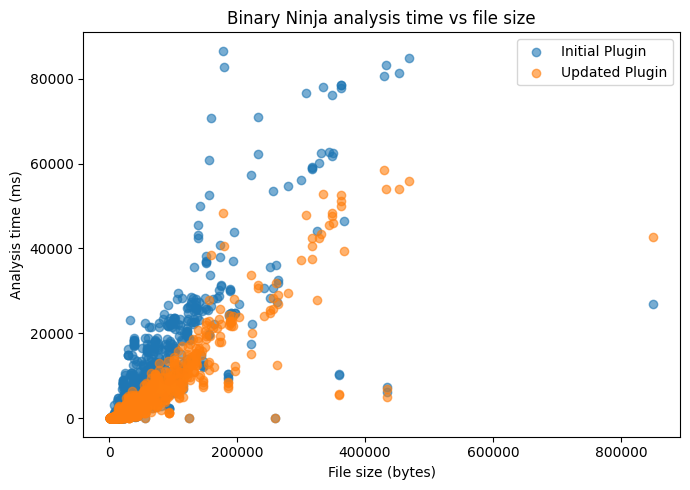

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DEGREE = 2  # ≥2 for quadratic or higher
# Explicit column order so pandas auto-parses them correctly
cols = ["file", "size_bytes", "elapsed_ms",
        "functions", "instructions", "unimpl_total"]


plt.figure(figsize=(7, 5))

# Initial Plugin
CSV_PATH = "/home/nicabi/Desktop/EPFL/SemProject/binja-xtensa-epfl-project/evaluation/analysis_times_initial_plugin_latest_3.csv"

df = pd.read_csv(CSV_PATH, usecols=cols)
# Ensure numeric fields are proper numbers
for c in cols[1:]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df.sort_values("size_bytes", inplace=True)
print(f"{len(df)} rows loaded")
df.head()

plt.figure(figsize=(7, 5))

# Scatter plot
plt.scatter(df["size_bytes"], df["elapsed_ms"], alpha=0.6, label="Initial Plugin")
coeffs = np.polyfit(df["size_bytes"], df["elapsed_ms"], DEGREE)
poly_fn = np.poly1d(coeffs)
x_line = np.linspace(df["size_bytes"].min(), df["size_bytes"].max(), 300)
# plt.plot(x_line, poly_fn(x_line), linewidth=2, color="blue")
# Updated plugin
CSV_PATH = "/home/nicabi/Desktop/EPFL/SemProject/binja-xtensa-epfl-project/evaluation/analysis_times_updated_plugin_latest_3.csv"
df = pd.read_csv(CSV_PATH, usecols=cols)
# Ensure numeric fields are proper numbers
for c in cols[1:]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df.sort_values("size_bytes", inplace=True)
print(f"{len(df)} rows loaded")
df.head()

# Scatter plot
plt.scatter(df["size_bytes"], df["elapsed_ms"], alpha=0.6, label="Updated Plugin")
coeffs = np.polyfit(df["size_bytes"], df["elapsed_ms"], DEGREE)
poly_fn = np.poly1d(coeffs)
x_line = np.linspace(df["size_bytes"].min(), df["size_bytes"].max(), 300)
# plt.plot(x_line, poly_fn(x_line), linewidth=2, color="orange")


# Data 


plt.xlabel("File size (bytes)")
plt.ylabel("Analysis time (ms)")
plt.title("Binary Ninja analysis time vs file size")
plt.legend()
plt.tight_layout()
plt.savefig("timing.pdf")
plt.show()

# Code to plot unimplemented instructions histogramm

In [ ]:
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path

def plot_histogram(REPORT_PATH, top=10):

    # ------------------------------------------------------------------
    # 1)  Read only the lines after the "Break-down" header
    # ------------------------------------------------------------------
    with REPORT_PATH.open() as fh:
        # find header line and capture everything that follows it
        lines = fh.readlines()
    try:
        start = next(i for i, l in enumerate(lines)
                    if l.strip().startswith("Break-down of unimplemented mnemonics:")) + 1
    except StopIteration:
        raise ValueError("Header 'Break-down of unimplemented mnemonics:' not found")

    mnemonic_block = lines[start:]

    # ------------------------------------------------------------------
    # 2)  Extract "MNEMONIC  count" pairs
    # ------------------------------------------------------------------
    mnemonic_counts = collections.OrderedDict(
        (mnem, int(cnt))
        for mnem, cnt in re.findall(r"^\s*(\S+)\s+(\d+)$",
                                    "\n".join(mnemonic_block), flags=re.M)
    )

    items = sorted(mnemonic_counts.items(), key=lambda kv: kv[1], reverse=True)
    if top != 0:
        items = items[:top]
    return items

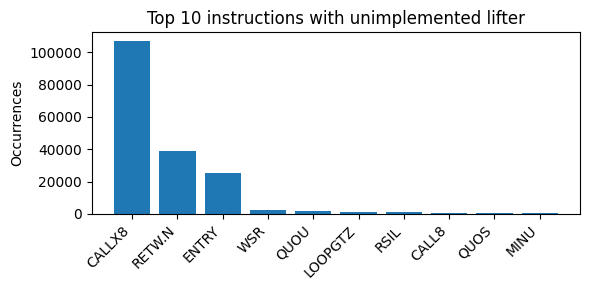

In [ ]:
# Initial plugin unimplemented
REPORT_PATH = Path("sdk_files_initial_plugin.txt")
items = plot_histogram(REPORT_PATH)
if not items:
    print("No mnemonic data found.")
else:
    mnems, counts = zip(*items)
    plt.figure(figsize=(6, 3))
    plt.bar(mnems, counts)
    plt.title(f"Top {len(mnems)} instructions with unimplemented lifter")
    plt.ylabel("Occurrences")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("histogram_initial.pdf")
    plt.show()

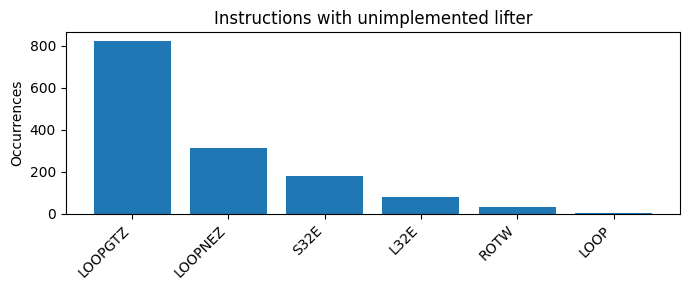

In [ ]:
# Updated Plugin
REPORT_PATH = Path("sdk_files_updated_plugin.txt")
items = plot_histogram(REPORT_PATH, 0)
if not items:
    print("No mnemonic data found.")
else:
    mnems, counts = zip(*items)
    plt.figure(figsize=(7, 3))
    plt.bar(mnems, counts)
    plt.title(f"Instructions with unimplemented lifter")
    plt.ylabel("Occurrences")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("histogram_update.pdf")
    plt.show()